<a href="https://colab.research.google.com/github/user-karthikeyan/BOOK/blob/master/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
dataset = pd.read_csv("drive/MyDrive/Dataset/book-data.csv")
dataset.dropna(subset=['description'], inplace=True)
dataset.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [ ]:
dataset.info

<bound method DataFrame.info of                                             bookId  \
0                         2767052-the-hunger-games   
1      2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                       2657.To_Kill_a_Mockingbird   
3                         1885.Pride_and_Prejudice   
4                                   41865.Twilight   
...                                            ...   
52473                           11492014-fractured   
52474                             11836711-anasazi   
52475                              10815662-marked   
52476                         11330278-wayward-son   
52477                 10991547-daughter-of-helaman   

                                           title                 series  \
0                               The Hunger Games    The Hunger Games #1   
1      Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                          To Kill a Mockingbird  To Kill a Mockingbird   
3                  

In [ ]:
dataset['genres'] = dataset['genres'].apply(ast.literal_eval)
# Convert the string representation of lists to actual lists

# Create a list to store all unique genres
all_genres = []

# Iterate over each row in the DataFrame and extract genres
for genres_list in dataset['genres']:
    all_genres.extend(genres_list)



<Axes: title={'center': 'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

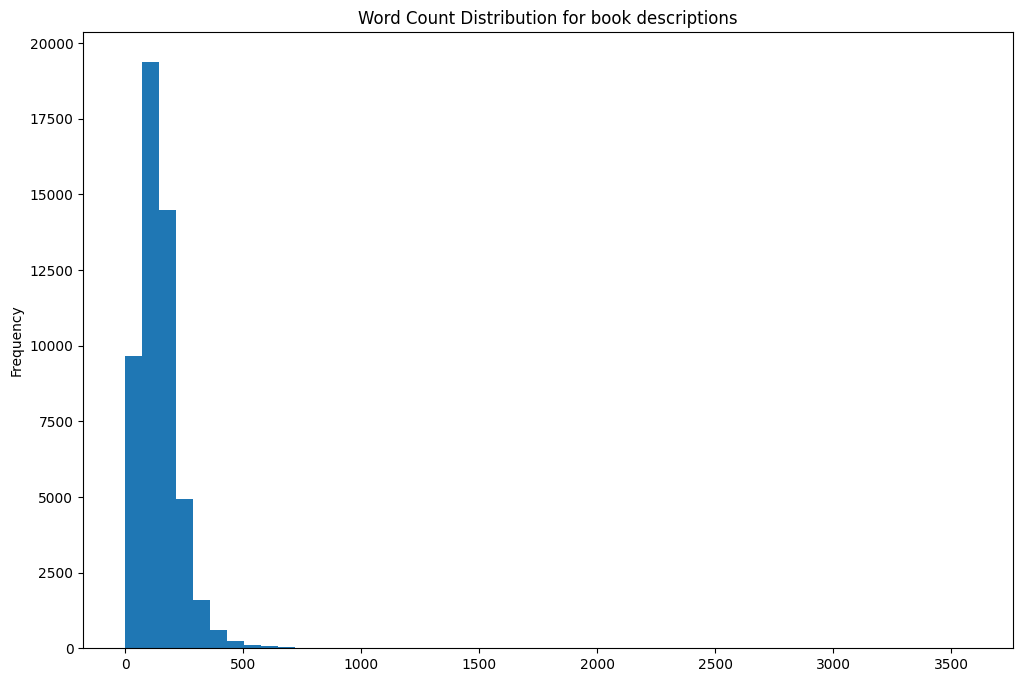

In [ ]:
dataset['word_count'] = dataset['description'].apply(lambda x: len(str(x).split()))
# Plotting the word count
dataset['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

<Axes: title={'center': 'Top 20 Part-of-speech tagging for comments'}>

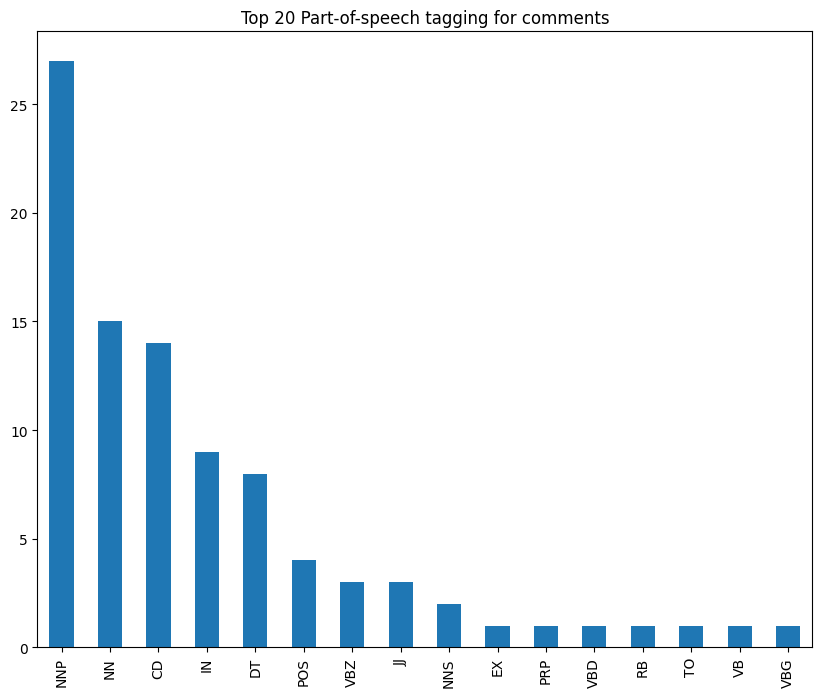

In [ ]:
from textblob import TextBlob

blob = TextBlob(str(dataset['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

<Axes: title={'center': 'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

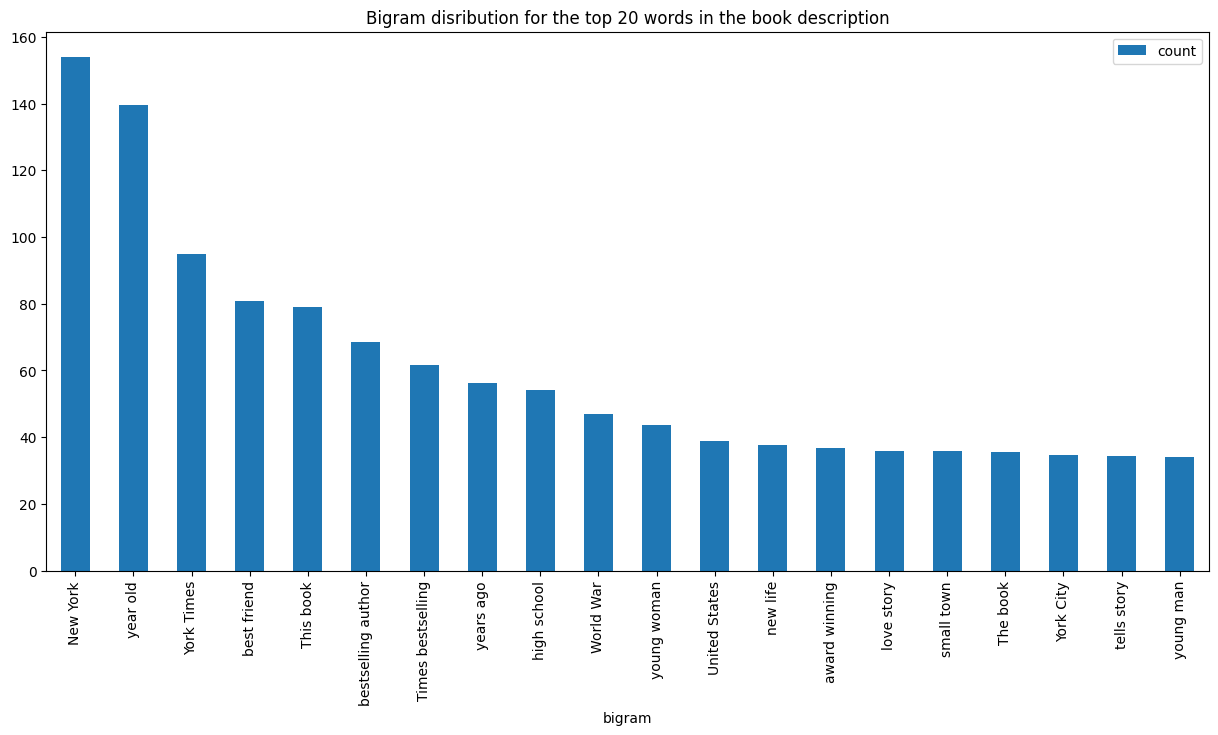

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(dataset['description'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

<Axes: title={'center': 'Trigram disribution for the top 20 words in the book description'}, xlabel='trigram'>

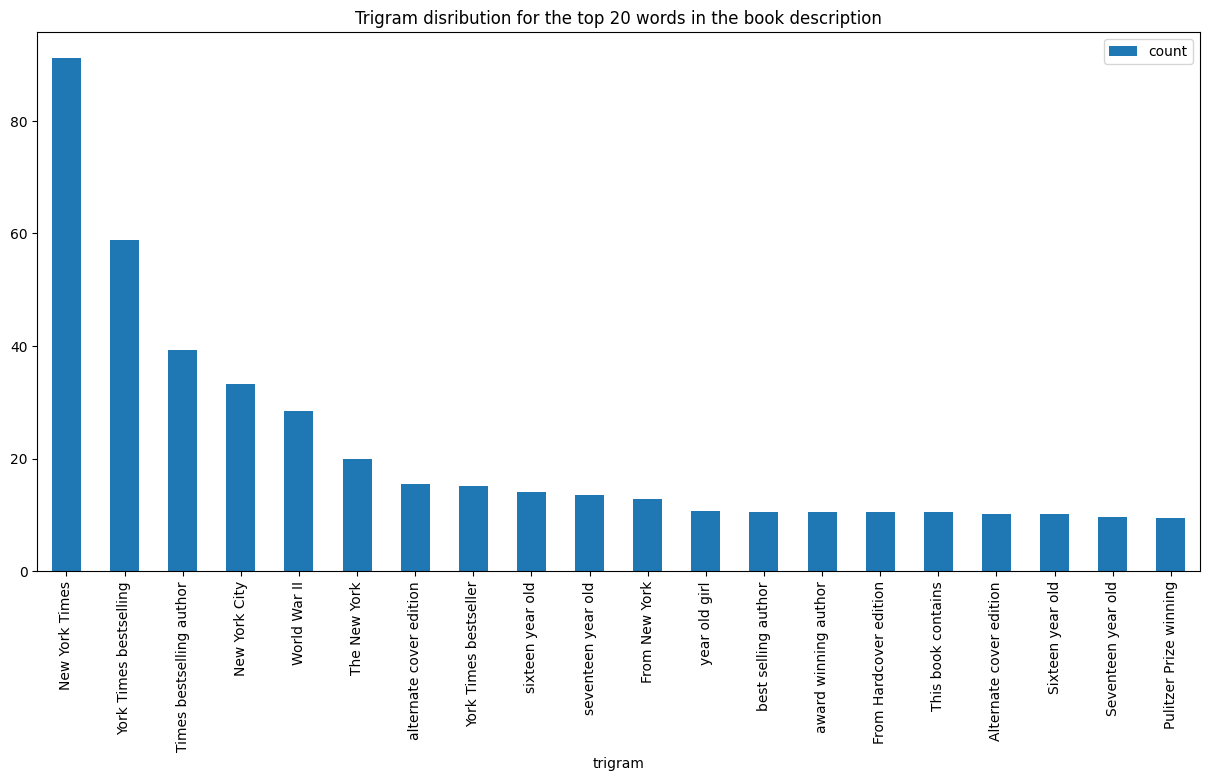

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(dataset['description'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True)
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7), )

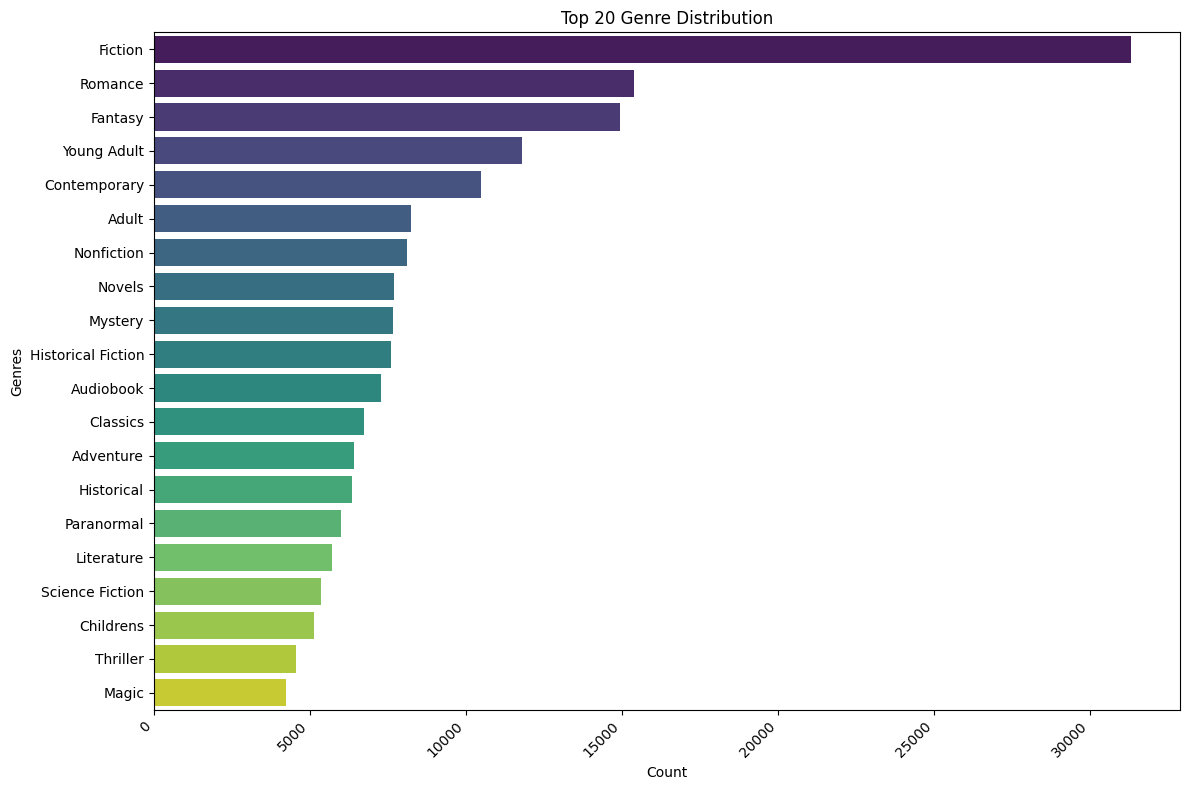

In [ ]:
genre_counts = pd.Series(all_genres).value_counts()

# Select the top N genres (e.g., top 10)
top_n_genres = genre_counts.head(20)

# Use Seaborn for plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_n_genres.values, y=top_n_genres.index, palette='viridis')

plt.title('Top 20 Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genres')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

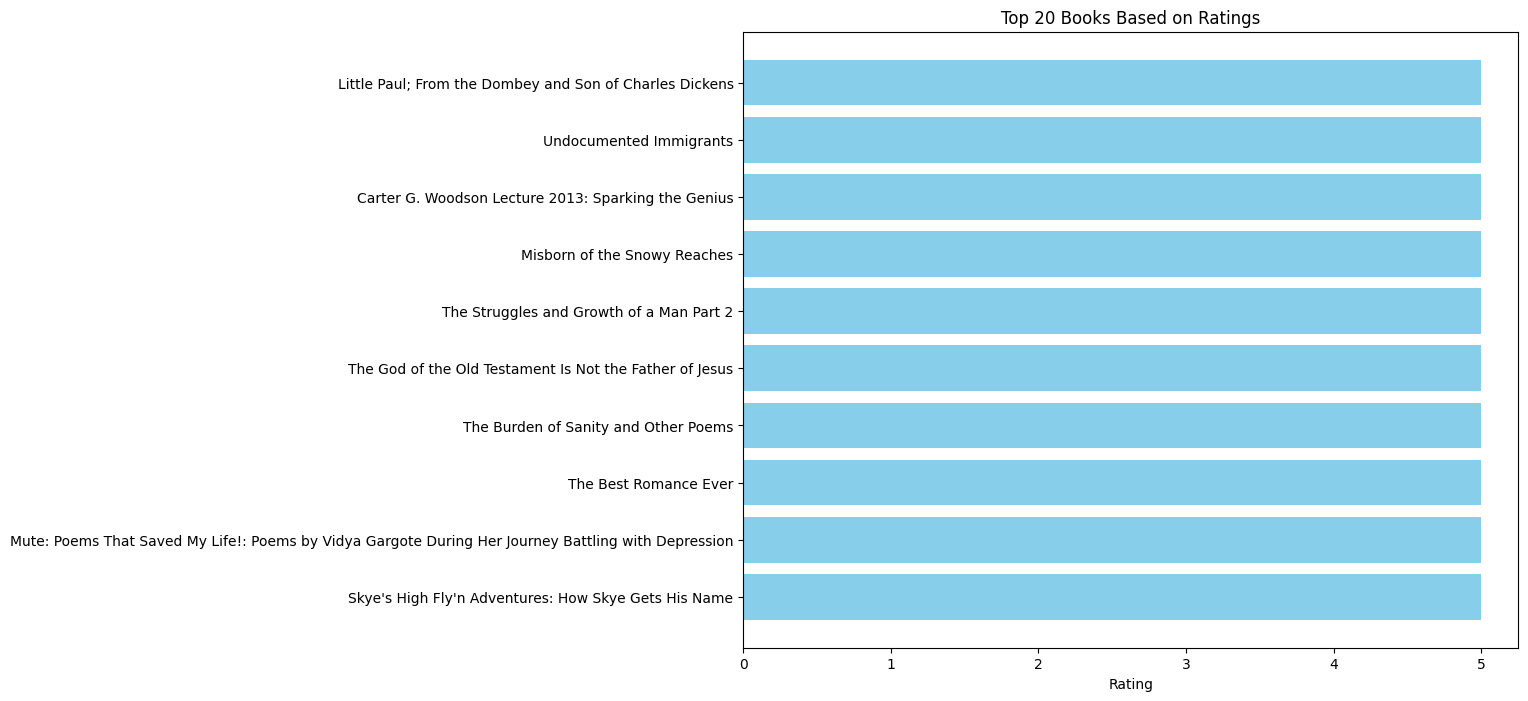

In [ ]:
top_10_books = dataset.sort_values(by='rating', ascending=False).head(10)

# Plotting the top 20 books
plt.figure(figsize=(10, 8))
plt.barh(top_10_books['title'], top_10_books['rating'], color='skyblue')
plt.xlabel('Rating')
plt.title('Top 20 Books Based on Ratings')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

**Cleaning the description column**

---


  Since the data may contain discrpencies it is neccessary to take care of it. Here we're remvoing non Ascii chars, html and stop words and finally converted lower characters

In [ ]:
# @title Cleaning

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

dataset['cleaned_desc'] = dataset['description'].apply(_removeNonAscii)
dataset['cleaned_desc'] = dataset.cleaned_desc.apply(func = make_lower_case)
dataset['cleaned_desc'] = dataset.cleaned_desc.apply(func = remove_stop_words)
dataset['cleaned_desc'] = dataset.cleaned_desc.apply(func = remove_punctuation)
dataset['cleaned_desc'] = dataset.cleaned_desc.apply(func = remove_html)
dataset = dataset[dataset['cleaned_desc'] != '']

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import hstack
import anvil.server

anvil.server.connect("server_6GZE77FWPQT45ZX63BNN2CTT-AUDKSWW3DRIXTQCU")

data = dataset
data.reset_index(level=0, inplace=True)

# Convert the index into series
indices = pd.Series(data.index, index=data['title'])

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['cleaned_desc'])

# Convert the list of genres into binary features
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(data['genres']), columns=mlb.classes_)

# Concatenate the genre features with the TF-IDF matrix
combined_matrix = hstack([tfidf_matrix, genre_features]).tocsr()

k = 10
knn = NearestNeighbors(n_neighbors=k, metric='cosine')
knn.fit(combined_matrix)
@anvil.server.callable
def recommend(title):
    # Get the index of the input book title
    book_index = indices.loc[title]

    # Find k+1 nearest neighbors, including the input book
    similarity, index = knn.kneighbors(combined_matrix[book_index], n_neighbors=k+1)

    # Filter out the input book from the recommended list
    recommended_books = data.iloc[index[0][1:]]

    books = []
    default = 'https://publications.iarc.fr/uploads/media/default/0001/02/thumb_1212_default_publication.jpeg'

    # Print or return the recommended book titles
    for i in recommended_books.index:
        url = data['coverImg'][i]
        title = data['title'][i]
        books.append({'url':url if type(url) == str else default, 'title':title})

    return books

anvil.server.wait_forever()